In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

Data from: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-detail.html
Age, Sex, Race, and Hispanic Origin - 6 race groups (5 race alone groups and one multiple race group) (SC-EST2019-ALLDATA6) 

In [2]:
census_data = pd.read_csv('sc-est2019-alldata6.csv')
census_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


In [3]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236844 entries, 0 to 236843
Data columns (total 21 columns):
SUMLEV               236844 non-null int64
REGION               236844 non-null int64
DIVISION             236844 non-null int64
STATE                236844 non-null int64
NAME                 236844 non-null object
SEX                  236844 non-null int64
ORIGIN               236844 non-null int64
RACE                 236844 non-null int64
AGE                  236844 non-null int64
CENSUS2010POP        236844 non-null int64
ESTIMATESBASE2010    236844 non-null int64
POPESTIMATE2010      236844 non-null int64
POPESTIMATE2011      236844 non-null int64
POPESTIMATE2012      236844 non-null int64
POPESTIMATE2013      236844 non-null int64
POPESTIMATE2014      236844 non-null int64
POPESTIMATE2015      236844 non-null int64
POPESTIMATE2016      236844 non-null int64
POPESTIMATE2017      236844 non-null int64
POPESTIMATE2018      236844 non-null int64
POPESTIMATE2019      236844 

In [4]:
census_data.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'SEX', 'ORIGIN',
       'RACE', 'AGE', 'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019'],
      dtype='object')

In [5]:
census_data.shape

(236844, 21)

In [6]:
race_dict= {1: 'White', 2:'African American',3: 'Native American', 4: 'Asian',5: 'Pacific Islander', 6: 'Mixed'}
race_dict

{1: 'White',
 2: 'African American',
 3: 'Native American',
 4: 'Asian',
 5: 'Pacific Islander',
 6: 'Mixed'}

In [7]:
census_data['Race Group'] = census_data['RACE'].map(race_dict)

Create 3 broad race categories, 'White, non-hispanic','Hispanic', 'Black, non-hispanic', 'Other'.  Other is any person who is neither black, white, or hispanic.

Combined: Origin = 0, non-Hispanic: Origin = 1, Hispanic: Origin = 2 from: https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/sc-est2019-alldata6.pdf

In [8]:
def race_cat(group, origin):
    if origin == 2:
        cat = 'Hispanic'
    else:
        if group == 'White':
            cat = 'White'
        elif group == 'African American':
            cat = 'Black'
        else:
            cat = 'Other'
    return cat

f1 = lambda x: race_cat(x['Race Group'],x['ORIGIN'])
census_data['Race Category'] = census_data.apply(f1, axis=1)
census_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,...,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,Race Group,Race Category
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37824,36812,37575,37698,37629,37526,36370,35594,White,White
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38597,37854,36968,37882,37732,37904,37641,36679,White,White
2,40,3,6,1,Alabama,0,0,1,2,39738,...,37653,38528,37769,37123,38048,37975,38172,37904,White,White
3,40,3,6,1,Alabama,0,0,1,3,39827,...,38113,37716,38605,37896,37266,38170,38197,38510,White,White
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39628,38122,37751,38625,37954,37322,38312,38476,White,White


Remove combined origin and sex data to allow data aggregation calculations.

In [9]:
census_data = census_data[(census_data['SEX']!=0)&(census_data['ORIGIN']!=0)].copy()
total_pop = census_data['CENSUS2010POP'].sum()
total_pop                                           

308745538

Combined: Sex = 0, Male: Sex = 1, Female: Sex = 2
from: https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/sc-est2019-alldata6.pdf

In [10]:
male = census_data[census_data['SEX']==1]
male_pop = male['CENSUS2010POP'].sum()
male_pop, male_pop/total_pop

(151781326, 0.49160654104740453)

In [11]:
female = census_data[census_data['SEX']==2]
female_pop = female['CENSUS2010POP'].sum()
female_pop, female_pop/total_pop

(156964212, 0.5083934589525955)

In [177]:
(female.groupby('NAME')['CENSUS2010POP'].sum()/census_data.groupby('NAME')['CENSUS2010POP'].sum()).sort_values()

NAME
Alaska                  0.479567
Wyoming                 0.490022
North Dakota            0.494694
Nevada                  0.495060
Utah                    0.497694
Montana                 0.498020
Colorado                0.498794
Idaho                   0.499022
Hawaii                  0.499197
South Dakota            0.499643
Washington              0.501868
California              0.502930
Arizona                 0.503158
Wisconsin               0.503709
Minnesota               0.503739
Nebraska                0.503764
Kansas                  0.503908
Texas                   0.503997
Iowa                    0.504877
Oklahoma                0.504984
Oregon                  0.505099
New Mexico              0.505909
New Hampshire           0.506716
West Virginia           0.506968
Vermont                 0.507454
Kentucky                0.508004
Indiana                 0.508045
Arkansas                0.509027
Virginia                0.509315
Michigan                0.509481
Illin

In [179]:
Plus_30 = census_data[census_data['AGE']>29]
pop_plus_30 = Plus_30['CENSUS2010POP'].sum()
pop_plus_30

182790134

In [206]:
pop_plus_30/total_pop

0.5920413787486056

In [193]:
Male_pop_30 = male[male['AGE']>29]
Male_pop_30['CENSUS2010POP'].sum()/pop_plus_30

0.478904217007686

In [194]:
Female_pop_30 = female[female['AGE']>29]
Female_pop_30['CENSUS2010POP'].sum()/pop_plus_30

0.5210957829923141

In [12]:
race_pop = census_data.groupby('Race Category')['CENSUS2010POP'].sum()
race_pop

Race Category
Black        37922522
Hispanic     50477594
Other        23026466
White       197318956
Name: CENSUS2010POP, dtype: int64

In [13]:
race_pop/total_pop

Race Category
Black       0.122828
Hispanic    0.163493
Other       0.074581
White       0.639099
Name: CENSUS2010POP, dtype: float64

In [204]:
race_pop_plus30 = Plus_30.groupby('Race Category')['CENSUS2010POP'].sum()
race_pop_plus30

Race Category
Black        20365909
Hispanic     22882192
Other        11985884
White       127556149
Name: CENSUS2010POP, dtype: int64

In [205]:
race_pop_plus30/pop_plus_30

Race Category
Black       0.111417
Hispanic    0.125183
Other       0.065572
White       0.697828
Name: CENSUS2010POP, dtype: float64

In [190]:
(census_data[census_data['Race Category']=='Other'].groupby('NAME')['CENSUS2010POP'].sum()/\
 census_data.groupby('NAME')['CENSUS2010POP'].sum()).sort_values()

NAME
West Virginia           0.021963
Mississippi             0.022712
Kentucky                0.028052
Alabama                 0.029273
South Carolina          0.030151
Maine                   0.030448
Tennessee               0.031098
Vermont                 0.031377
Indiana                 0.033145
Louisiana               0.033770
Iowa                    0.034040
Ohio                    0.035916
Arkansas                0.036451
New Hampshire           0.036981
Missouri                0.038588
Idaho                   0.041108
Nebraska                0.041233
Florida                 0.041403
Pennsylvania            0.042540
Wyoming                 0.043529
Wisconsin               0.045067
Michigan                0.048523
North Carolina          0.049602
Georgia                 0.050125
Rhode Island            0.051763
Colorado                0.053858
Texas                   0.053931
Kansas                  0.054676
Delaware                0.054903
Utah                    0.055304
Conne

In [14]:
p_female = female_pop/total_pop
p_male = male_pop/total_pop
p_female, p_male

(0.5083934589525955, 0.49160654104740453)

Run simple simulation, choosing 100 seats from the population at large, to understand the expected gender distribution, assuming process is unbiased selection from underlying population.  Note the US Senate (116th) includes 74 male members and 26 female members.  As shown above, females are about 51% of the population and males are 49%.

In [113]:
random.seed(0)

simulations = 1000000
seats = 100

num_males = []
num_females = []

for i in range(simulations):
    males = 0
    females = 0
    for j in range(seats):
        vote = random.random()
        if vote > p_female:
            males += 1
        else:
            females +=1
    num_males.append(males)
    num_females.append(females)
   

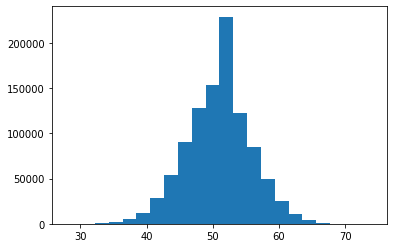

In [114]:
plt.hist(num_females, bins = 22)
plt.show()

In [115]:
np.min(num_females), np.min(num_males)

(28, 26)

In [116]:
np.mean(num_females), np.mean(num_males)

(50.838462, 49.161538)

You must be 30 years or older to be elected Senator.  Likewise, Senators are selected on a state-by-state basis, not from the general population.  

In [198]:
P_female_dict = (Female_pop_30.groupby('NAME')['CENSUS2010POP'].sum()/Plus_30.groupby('NAME')['CENSUS2010POP'].sum()).to_dict()
P_female_dict

{'Alabama': 0.5282649905427522,
 'Alaska': 0.48196803998440974,
 'Arizona': 0.5147235861947849,
 'Arkansas': 0.5210084568492378,
 'California': 0.5155952434852578,
 'Colorado': 0.508456120920151,
 'Connecticut': 0.5283082717962277,
 'Delaware': 0.5292470859598168,
 'District of Columbia': 0.5296040018126678,
 'Florida': 0.5237187335205615,
 'Georgia': 0.5261589093245346,
 'Hawaii': 0.5120773005143153,
 'Idaho': 0.5072376384554538,
 'Illinois': 0.5227844126733479,
 'Indiana': 0.5200172689969477,
 'Iowa': 0.5168732076453226,
 'Kansas': 0.516500359399282,
 'Kentucky': 0.5198993544059568,
 'Louisiana': 0.5230129517953327,
 'Maine': 0.5218900095367454,
 'Maryland': 0.5320842267874847,
 'Massachusetts': 0.5296761798152443,
 'Michigan': 0.5216855474305986,
 'Minnesota': 0.5128004689005167,
 'Mississippi': 0.5292617632007007,
 'Missouri': 0.5225481015338053,
 'Montana': 0.5068553394891933,
 'Nebraska': 0.5149902843819664,
 'Nevada': 0.500099366694548,
 'New Hampshire': 0.5163679275294988,
 'Ne

In [199]:
del P_female_dict['District of Columbia']
P_female_senate_dict = (female_census_pop/state_census_pop).to_dict()

Re-perform simulation on a state-by-state basis, to account for any differences in outcome due to sex distribution within individual states.

In [201]:
simulations = 1000000

num_males = np.zeros(simulations)
num_females = np.zeros(simulations)

for i in range(simulations):
    males = 0
    females = 0
    for j in P_female_dict.keys():
        for k in range(2):
            vote = random.random()
            if vote > P_female_dict[j]:
                males += 1
            else:
                females +=1
    num_males[i] = males
    num_females[i] = females

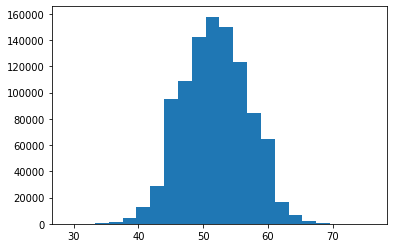

In [202]:
plt.hist(num_females, bins = 22)
plt.show()

In [203]:
np.min(num_females), np.min(num_males)

(29.0, 24.0)

Actual number of females currently in the Senate is 26.

In [221]:
np.max(num_females), np.max(num_males)

(76.0, 71.0)

In [207]:
M_med = np.mean(num_males)
F_med = np.mean(num_females)
F_med, M_med

(51.836255, 48.163745)

In [219]:
F_std = np.std(num_females)
print('99% confidence interval for female seats: ' + str((F_med-(2.576*F_std))) +', ' +str((F_med+(2.576*F_std))))

99% confidence interval for female seats: 38.96889478831473, 64.70361521168527


In [220]:
M_std = np.std(num_males)
print('99% confidence interval for male seats: ' + str((M_med-(2.576*M_std))) +', ' +str((M_med+(2.576*M_std))))

99% confidence interval for male seats: 35.296384788314725, 61.03110521168527


0 cases out of 1 million would randomly result in less than 29 female Senators, if the selection of Senators is unbiased.  P-value is 0; according to this model it is impossible for an unbiased process to result in only 26 female senators.

Compute 99% confidence intervals for number of male and female Senate members

Now consider both race and sex together.

In [27]:
groups = census_data['Race Category'].unique().tolist()
groups

['White', 'Black', 'Other', 'Hispanic']

In [223]:
state_pops = Plus_30.groupby('NAME')['CENSUS2010POP'].sum()
state_pops

NAME
Alabama                  2857068
Alaska                    392553
Arizona                  3689794
Arkansas                 1728185
California              21291556
Colorado                 2943430
Connecticut              2216278
Delaware                  543661
District of Columbia      344244
Florida                 11880335
Georgia                  5552009
Hawaii                    828869
Idaho                     877358
Illinois                 7544873
Indiana                  3805664
Iowa                     1814652
Kansas                   1640237
Kentucky                 2617899
Louisiana                2607901
Maine                     865075
Maryland                 3469680
Massachusetts            4009293
Michigan                 5976100
Minnesota                3144377
Mississippi              1707826
Missouri                 3570988
Montana                   607118
Nebraska                 1055517
Nevada                   1590070
New Hampshire             833001
New J

In [226]:
case = Female_pop_30[Female_pop_30['Race Category'] == groups[0]]
prob_series = case.groupby('NAME')['CENSUS2010POP'].sum()/state_pops
prob_series = prob_series.rename("Female_White")
race_prob = prob_series.to_frame()

for i in range(1,4):
    case = Female_pop_30[Female_pop_30['Race Category'] == groups[i]]
    prob_series = case.groupby('NAME')['CENSUS2010POP'].sum()/state_pops
    name = 'Female_' + groups[i]
    race_prob[name] = prob_series
    
for i in range(4):
    case = Male_pop_30[Male_pop_30['Race Category'] == groups[i]]
    prob_series = case.groupby('NAME')['CENSUS2010POP'].sum()/state_pops
    name = 'Male_' + groups[i]
    race_prob[name] = prob_series    
    
race_prob

,Female_White,Female_Black,Female_Other,Female_Hispanic,Male_White,Male_Black,Male_Other,Male_Hispanic
NAME,,,,,,,,
Alabama,0.374638,0.130291,0.012815,0.010522,0.343714,0.103199,0.011043,0.013780
Alaska,0.335167,0.012572,0.114527,0.019702,0.376805,0.016247,0.104872,0.020107
Arizona,0.348074,0.016118,0.038590,0.111942,0.327677,0.017590,0.032765,0.107244
Arkansas,0.415110,0.072248,0.014942,0.018709,0.383924,0.060082,0.013148,0.021838
California,0.245048,0.030536,0.089256,0.150756,0.234470,0.028309,0.075110,0.146516
Colorado,0.390568,0.016497,0.024121,0.077270,0.374384,0.018781,0.020208,0.078171
Connecticut,0.408405,0.045839,0.023107,0.050958,0.366038,0.037574,0.020787,0.047292
Delaware,0.377730,0.102908,0.022628,0.025981,0.339931,0.083526,0.019950,0.027346
District of Columbia,0.164991,0.296490,0.029447,0.038676,0.178806,0.228617,0.021833,0.041139


In [230]:
states = race_prob.index.tolist()
states.remove('District of Columbia')
len(states)

50

In [246]:

simulations = 200000

outcomes = ['FW','FB','FO','FH','MW','MB','MO','MH']

keys = race_prob.columns
congress_results_dict = {}
for i in keys:
    congress_results_dict[i] = np.zeros(simulations)

for i in range(simulations):
    election = {'FW':0,'FB':0,'FO':0,'FH':0,'MW':0,'MB':0,'MO':0,'MH':0}
    for j in states:
        weights = race_prob.loc[j].values
        for k in range(2):
            result = random.choices(outcomes, weights=weights)
            election[result[0]] +=1
    for k in election.keys():
        if k == 'FW':
            congress_results_dict['Female_White'][i] = election[k]
        if k == 'FB':
            congress_results_dict['Female_Black'][i] = election[k]
        if k == 'FO':
            congress_results_dict['Female_Other'][i] = election[k]
        if k == 'FH':
            congress_results_dict['Female_Hispanic'][i] = election[k]            
        if k == 'MW':
            congress_results_dict['Male_White'][i] = election[k] 
        if k == 'MB':
            congress_results_dict['Male_Black'][i] = election[k]   
        if k == 'MO':
            congress_results_dict['Male_Other'][i] = election[k]
        if k == 'MH':
            congress_results_dict['Male_Hispanic'][i] = election[k]  
            


In [247]:
for key in congress_results_dict.keys():
    sim_results = congress_results_dict[key]
    ave = np.mean(sim_results)
    lowest = np.min(sim_results)
    high = np.max(sim_results)
    dev = np.std(sim_results)
    confidence = ((ave-(1.960*dev)), (ave+(1.960*dev)))
    print(key + ': ' +str(ave) + ', ' +str(lowest)+', ' + str(high) + ', ' +str(confidence))

Female_White: 39.597665, 20.0, 61.0, (30.109369669334303, 49.0859603306657)
Female_Black: 4.86317, 0.0, 17.0, (0.7542285284886621, 8.972111471511338)
Female_Other: 3.468175, 0.0, 13.0, (0.021584707280106752, 6.914765292719894)
Female_Hispanic: 3.91038, 0.0, 14.0, (0.2171458808690505, 7.603614119130949)
Male_White: 37.04973, 17.0, 58.0, (27.66414420287751, 46.435315797122485)
Male_Black: 4.138905, 0.0, 15.0, (0.3031442373369324, 7.974665762663069)
Male_Other: 3.01786, 0.0, 12.0, (-0.22448656259454136, 6.260206562594542)
Male_Hispanic: 3.954115, 0.0, 14.0, (0.21218313320674742, 7.696046866793252)


In [251]:
total_white = []

for i in range(simulations):
    male_white = congress_results_dict['Male_White'][i]
    female_white = congress_results_dict['Female_White'][i]
    total_white.append(male_white + female_white)

        
total_white.sort()
stdev = np.std(total_white)
white_ave = np.mean(total_white)
white_ave, ((white_ave - 2.576*stdev), (white_ave + 2.576*stdev)), total_white[-10:]

(76.647395,
 (66.39531800500615, 86.89947199499386),
 [91.0, 91.0, 91.0, 91.0, 91.0, 92.0, 92.0, 92.0, 92.0, 93.0])

In [249]:
white_ave = np.mean(total_white)
white_ave, ((white_ave - 1.960*stdev), (white_ave + 1.960*stdev)), total_white[-10:]

(76.647395,
 (68.8469016342438, 84.4478883657562),
 [91.0, 91.0, 91.0, 91.0, 91.0, 92.0, 92.0, 92.0, 92.0, 93.0])

In [255]:
total_black = []

for i in range(simulations):
    male_black = congress_results_dict['Male_Black'][i]
    female_black = congress_results_dict['Female_Black'][i]
    total_black.append(male_black + female_black)

        
total_black.sort()
stdev = np.std(total_black)
black_ave = np.mean(total_black)
black_ave, ((black_ave - 2.576*stdev), (black_ave + 2.576*stdev)), total_black[:20]

(9.002075,
 (1.9659486433605045, 16.038201356639494),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0])

In [256]:
total_hisp = []

for i in range(simulations):
    male_hisp = congress_results_dict['Male_Hispanic'][i]
    female_hisp = congress_results_dict['Female_Hispanic'][i]
    total_hisp.append(male_hisp + female_hisp)

        
total_hisp.sort()
stdev = np.std(total_hisp)
hisp_ave = np.mean(total_hisp)
hisp_ave, ((hisp_ave - 2.576*stdev), (hisp_ave + 2.576*stdev)), total_hisp[:20]

(7.864495,
 (1.2712767721560567, 14.457713227843943),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [258]:
total_other = []

for i in range(simulations):
    male_other = congress_results_dict['Male_Other'][i]
    female_other = congress_results_dict['Female_Other'][i]
    total_other.append(female_other + male_other)

        
total_other.sort()
stdev = np.std(total_other)
other_ave = np.mean(total_other)
other_ave, ((other_ave - 2.576*stdev), (other_ave + 2.576*stdev)), total_other[:20]

(6.486035,
 (0.6263993695571255, 12.345670630442875),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])